# Proyecto de analisis de ventas en una tienda de ropa
Recopilación y limpieza de datos: Se reunirían los datos de ventas históricas, incluyendo información sobre fechas, productos, precios, etc. Estos datos se limpiarían para eliminar cualquier información faltante o incorrecta.

Análisis exploratorio de datos: Se analizarían los datos recolectados para identificar patrones y tendencias en las ventas. Se podrían crear gráficos y tablas para visualizar esta información.

Selección de características: Se seleccionarían las características relevantes para el modelo de machine learning, como la fecha, el precio del producto, la promoción, etc.

Entrenamiento del modelo: Se utilizaría un algoritmo de aprendizaje automático para entrenar el modelo con los datos de ventas históricos y las características seleccionadas.

Evaluación del modelo: Se evaluaría el rendimiento del modelo utilizando técnicas como la validación cruzada y la prueba de conjunto de prueba para medir la precisión de las predicciones.

Implementación y monitoreo: Finalmente, se implementaría el modelo en un entorno de producción y se monitorearía su rendimiento continuamente para detectar y corregir cualquier problema.

## Carga de Datos

In [4]:
import pandas as pd

# Cargar el archivo csv en un DataFrame
data = pd.read_csv('Datos/VentasTiendaA.csv')

# Imprimir las primeras filas del DataFrame
data.head()


,fecha_venta,hora_venta,Producto,Valor_sugerido,venta_final,venta_inventario,valor_compra,contribucion,Comprador,fecha_ingreso_inventario,NOMBRE,sexo_producto,color_prenda,talla_prenda,proveedor,OBSERVACIONES
0,2022-05-31,1330.0,Gaban Negro Totas,89000.0,82000,NaN,NaN,NaN,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-31,1330.0,Blusa rosa Tulcan,66000.0,58000,NaN,NaN,NaN,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-01,1600.0,Blusa tejida caracol,59000.0,50000,NaN,NaN,NaN,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-02,1000.0,Gaban Murcielago,72000.0,60000,NaN,NaN,NaN,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-06,1400.0,Chaqueta Totas,93000.0,72500,NaN,NaN,NaN,Hombre,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Consultas Exploratorias

El atributo shape de un DataFrame de Pandas para obtener la cantidad de filas y columnas. El primer elemento de la tupla devuelta es el número de filas y el segundo elemento es el número de columnas. Por ejemplo, si tienes un DataFrame llamado df, el siguiente código te dará el número de filas:

¿Cuantas filas tiene dataset?

In [5]:
num_rows = data.shape[0]
print(num_rows)

396


¿Cuantos atributos tiene el dataset?

In [6]:
num_columns = data.shape[1]
print(num_columns)

16


¿Cuales son los nombres de los 16 atributos?

Puedes utilizar el atributo columns de un DataFrame de Pandas para obtener una lista con los nombres de las columnas. Por ejemplo, si tienes un DataFrame llamado df, el siguiente código te dará una lista con los nombres de las columnas:

In [7]:
col_names = data.columns.tolist()
print(col_names)


['fecha_venta', 'hora_venta', 'Producto', 'Valor_sugerido', 'venta_final', 'venta_inventario', 'valor_compra', 'contribucion', 'Comprador', 'fecha_ingreso_inventario', 'NOMBRE', 'sexo_producto', 'color_prenda', 'talla_prenda', 'proveedor', 'OBSERVACIONES']


¿Cual es la fecha de la primera y última venta?

Puedes usar el método min() y max() de una columna de fecha en un DataFrame de Pandas para obtener la primera fecha y la última fecha de venta. Por ejemplo, si tienes un DataFrame llamado df y una columna llamada "fecha_venta", el siguiente código te dará la primera fecha de venta:

In [8]:
first_sale_date = data['fecha_venta'].min()
print(first_sale_date)

last_sale_date = data['fecha_venta'].max()
print(last_sale_date)

2022-05-23
2022-12-31


Ten en cuenta que la columna fecha_venta debe ser de tipo datetime para poder utilizar estos metodos.

Es importante asegurarse que la columna fecha_venta esté en un formato de fecha válido y estandarizado para poder ser procesado, si no es el caso, se tendria que hacer un preprocesamiento previo para convertir el formato a uno valido.

¿Cuál es el valor total de las ventas realizadas por cada mes?

Puedes usar el método groupby() de un DataFrame de Pandas para agrupar las ventas por mes y luego utilizar el método sum() para obtener el valor total de las ventas para cada mes. Por ejemplo, si tienes un DataFrame llamado df con una columna llamada "fecha_venta" y una columna llamada "valor_venta", el siguiente código te dará el valor total de las ventas por mes:

In [11]:
import pandas as pd
data['fecha_venta'] = pd.to_datetime(data['fecha_venta'])
data['month'] = data['fecha_venta'].dt.month
sales_by_month = data.groupby(['month'])['venta_final'].sum()
print(sales_by_month)


month
5      200000
6     2869000
7     2415000
8     1977000
9     2300000
10    1999000
11    2828000
12    7344000
Name: venta_final, dtype: int64


Se importa la libreria pandas
Se convierte la columna fecha_venta a un objeto tipo datetime con pd.to_datetime()
Se crea una nueva columna llamada month que contiene solo el numero del mes de la fecha de venta
Se utiliza el metodo groupby() para agrupar las filas por el mes, y con el metodo sum() se suma el valor de las ventas para cada mes
En este caso, te devolverá una serie con el índice siendo el numero del mes y el valor siendo el total de las ventas para ese mes.

Es importante tener en cuenta que el codigo anterior supone que la columna fecha_venta esta en un formato de fecha valido, si no es el caso se debe de hacer un preprocesamiento previo para convertir el formato a uno valido.

¿Cuál es el mes de mayor ventas y su valor?

utilizar el método idxmax() o idxmin() para obtener el índice del mes con la mayor o menor venta, respectivamente, después de haber agrupado las ventas por mes y sumado el valor de ventas para cada mes.

Por ejemplo, si ya has ejecutado el código que te di anteriormente para obtener el valor total de las ventas por mes en una serie llamada sales_by_month, el siguiente código te dará el mes con la mayor venta:

In [13]:
max_sales_month = sales_by_month.idxmax()
print(max_sales_month)
print("Total de Ventas en el mes de mayor venta: ", sales_by_month.loc[max_sales_month])

12
Total de Ventas en el mes de mayor venta:  7344000


Puedes utilizar el método idxmax() o idxmin() para obtener el índice del mes con la mayor o menor venta, respectivamente, después de haber agrupado las ventas por mes y sumado el valor de ventas para cada mes.

Por ejemplo, si ya has ejecutado el código que te di anteriormente para obtener el valor total de las ventas por mes en una serie llamada sales_by_month, el siguiente código te dará el mes con la mayor venta:

¿Cuál es el mes de menor ventas y su valor?

In [16]:
min_sales_month = sales_by_month.idxmin()
print(min_sales_month)
print("Total de Ventas en el mes de menor venta: ", sales_by_month.loc[min_sales_month])

5
Total de Ventas en el mes de menor venta:  200000


¿Cual es el promedio de ventas por mes?

Puedes utilizar el método mean() de una serie para obtener el promedio de las ventas de los 8 meses.
Por ejemplo, si ya has ejecutado el código anterior para obtener el valor total de las ventas por mes en una serie llamada sales_by_month, el siguiente código te dará el promedio de las ventas para los 8 meses:

In [17]:
average_sales = sales_by_month.mean()
print(average_sales)

2741500.0


El método mean() devuelve el valor promedio de los valores de la serie, en este caso el valor promedio de las ventas de los 8 meses.

Ten en cuenta que si no se especifica un rango de meses en particular, este código te dará el promedio de todos los meses disponibles en tu DataFrame. Si necesitas calcular el promedio solo para los 8 meses específicos, debes seleccionar solo esos meses en el DataFrame antes de calcular el promedio.

Para especificar los meses que deseas promediar, puedes utilizar el método .loc[] para seleccionar solo esos meses en tu serie de ventas por mes antes de calcular el promedio.

Por ejemplo, si quieres calcular el promedio de las ventas solo para los meses de Enero, Febrero y Marzo, puedes usar el siguiente código:

In [18]:
average_sales = sales_by_month.loc[[6, 7, 8, 9, 10, 11, 12]].mean()
print(average_sales)

3104571.4285714286


Redondear el valor

el método round() para redondear el valor promedio resultante a un número específico de decimales. Por ejemplo, si ya has calculado el promedio de las ventas para los 8 meses y se guardo en una variable llamada average_sales, el siguiente código redondeará el valor promedio a 2 decimales:

In [19]:
rounded_average = round(average_sales, 2)
print(rounded_average)

3104571.43


generar graficas
Puedes utilizar la librería matplotlib para graficar las ventas por cada mes y una línea transversal que indique el valor promedio desde el mes 6.

Para graficar las ventas por cada mes, puedes utilizar el método plot() de una serie de ventas por mes. Por ejemplo, si ya has ejecutado el código anterior para obtener el valor total de las ventas por mes en una serie llamada sales_by_month, el siguiente código te ayudará a graficar las ventas por cada mes:

In [20]:
import matplotlib.pyplot as plt

sales_by_month.plot(kind='bar')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

Como no se encontró el modulo requerido entonces se realiza la instalación de matplotlib y seguido de esto vuelvo a ejecutar el anterior código.

In [21]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 166.0 kB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 161.3/161.3 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 1.7 MB/s eta 0:00:00


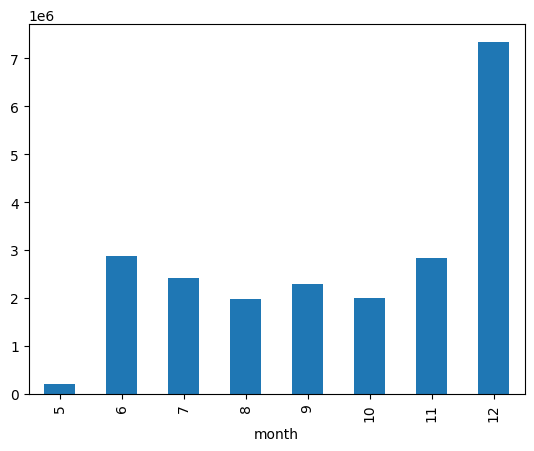

In [27]:
import matplotlib.pyplot as plt

sales_by_month.plot(kind='bar')
plt.show()

En este caso, el argumento kind='bar' indica que se desea graficar un gráfico de barras.

Para agregar una línea transversal que indique el valor promedio desde el mes 6, puedes utilizar el método axhline() de la librería matplotlib. Por ejemplo, si ya has calculado el promedio de las ventas desde el mes 6 y se guardo en una variable llamada average_sales_from_month_6, el siguiente código te ayudará a agregar una línea transversal que indique el valor promedio en el gráfico de barras:

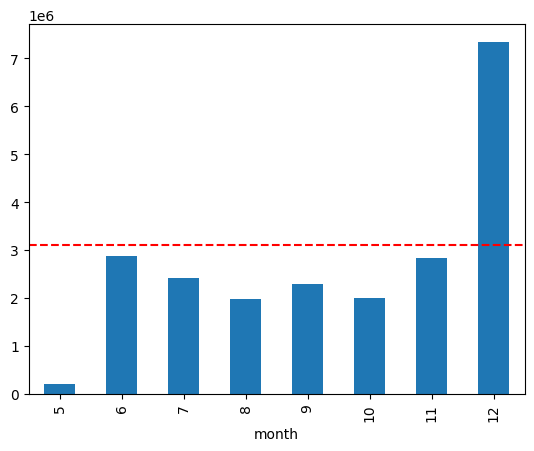

In [28]:
sales_by_month.plot(kind='bar')
plt.axhline(average_sales, color='r', linestyle='--')
plt.show()

Se quiere obtener una grafica más interactiva por lo cual vamos a instalar altair y codificar para obterner graficas con esta libreria 

In [29]:
!pip install altair

In [46]:
import altair as alt

chart = alt.Chart(sales_by_month.reset_index()).mark_bar().encode(x='month',y='venta_final')

(chart).display()


alt.Chart(...)

Cual es el orden de los colores más vendidos en el total de las ventas?

In [ ]:
# Create a new column 'mes' from the 'fecha_venta' column
data['month'] = data['fecha_venta'].dt.month

# Group the data by color, month and count the quantity of garments sold
sales_by_color_month = data.groupby(['color_prenda','month'])['cantidad_prendas'].sum().reset_index()

# Print the resulting table
print(sales_by_color_month)

In [47]:
# Group the data by month and count the unique colors
sales_by_month = data.groupby('month')['color_prenda'].nunique().reset_index()
sales_by_month = sales_by_month.rename(columns={'color_prenda':'cantidad_colores'})
# Print the resulting table
print(sales_by_month)

   month  cantidad_colores
0      5                 0
1      6                 3
2      7                15
3      8                13
4      9                15
5     10                12
6     11                15
7     12                34


In [54]:
month_11_data = data.query("month == 11")
colors_month_11 = month_11_data["color_prenda"].unique()
print(colors_month_11)

['CAFE' 'NEGRO' 'VERDE' 'NARANJA' 'GRIS CLARO' 'ROSADO' 'MOSTAZA' 'CRUDO'
 'GRIS' 'ROJO' 'CAMEL' 'AZUL' 'NEGRO BLANCO' 'NEGRO-BEIGE' 'CREMA']


In [55]:
month_11_data = data[data["month"] == 11]
color_month_11 = month_11_data.groupby("color_prenda").size().reset_index(name="cantidad_colores")
color_month_11 = color_month_11.sort_values("cantidad_colores",ascending=False)
color_month_11 = color_month_11.reset_index(drop=True)
colors_month_11 = color_month_11["color_prenda"].tolist()
print(colors_month_11)


['NEGRO', 'GRIS', 'ROJO', 'AZUL', 'CAMEL', 'CRUDO', 'GRIS CLARO', 'MOSTAZA', 'VERDE', 'CAFE', 'CREMA', 'NARANJA', 'NEGRO BLANCO', 'NEGRO-BEIGE', 'ROSADO']
